In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import re

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif ,f_regression, mutual_info_regression

from sklearn.model_selection import train_test_split

import xgboost as xgb

import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("SolarPrediction.csv")


In [3]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [4]:
df['Data'] = pd.to_datetime(df['Data']).dt.date


In [5]:
df['Month']=pd.to_datetime(df['Data']).dt.month
df['Day']=pd.to_datetime(df['Data']).dt.day
df['Year']=pd.to_datetime(df['Data']).dt.year
df['Hour']=pd.to_datetime(df['Time']).dt.hour
df['Minute']=pd.to_datetime(df['Time']).dt.minute
df['Second']=pd.to_datetime(df['Time']).dt.second

In [6]:
df['SunriseHour']=df['TimeSunRise'].apply(lambda x: re.search(r'^\d+',x).group(0)).astype(int)
df['SunriseMinute']=df['TimeSunRise'].apply(lambda x: re.search(r':(\d+)',x).group(1)).astype(int)
df['SunsetHour']=df['TimeSunSet'].apply(lambda x: re.search(r'^\d+',x).group(0)).astype(int)
df['SunsetMinute']=df['TimeSunSet'].apply(lambda x: re.search(r':(\d+)',x).group(1)).astype(int)

In [7]:
df.drop(['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'],axis=1,inplace=True)

In [8]:
df.isnull().sum().sum()

0

In [9]:
X=df.drop(['Radiation'],axis=1)
y=df['Radiation']

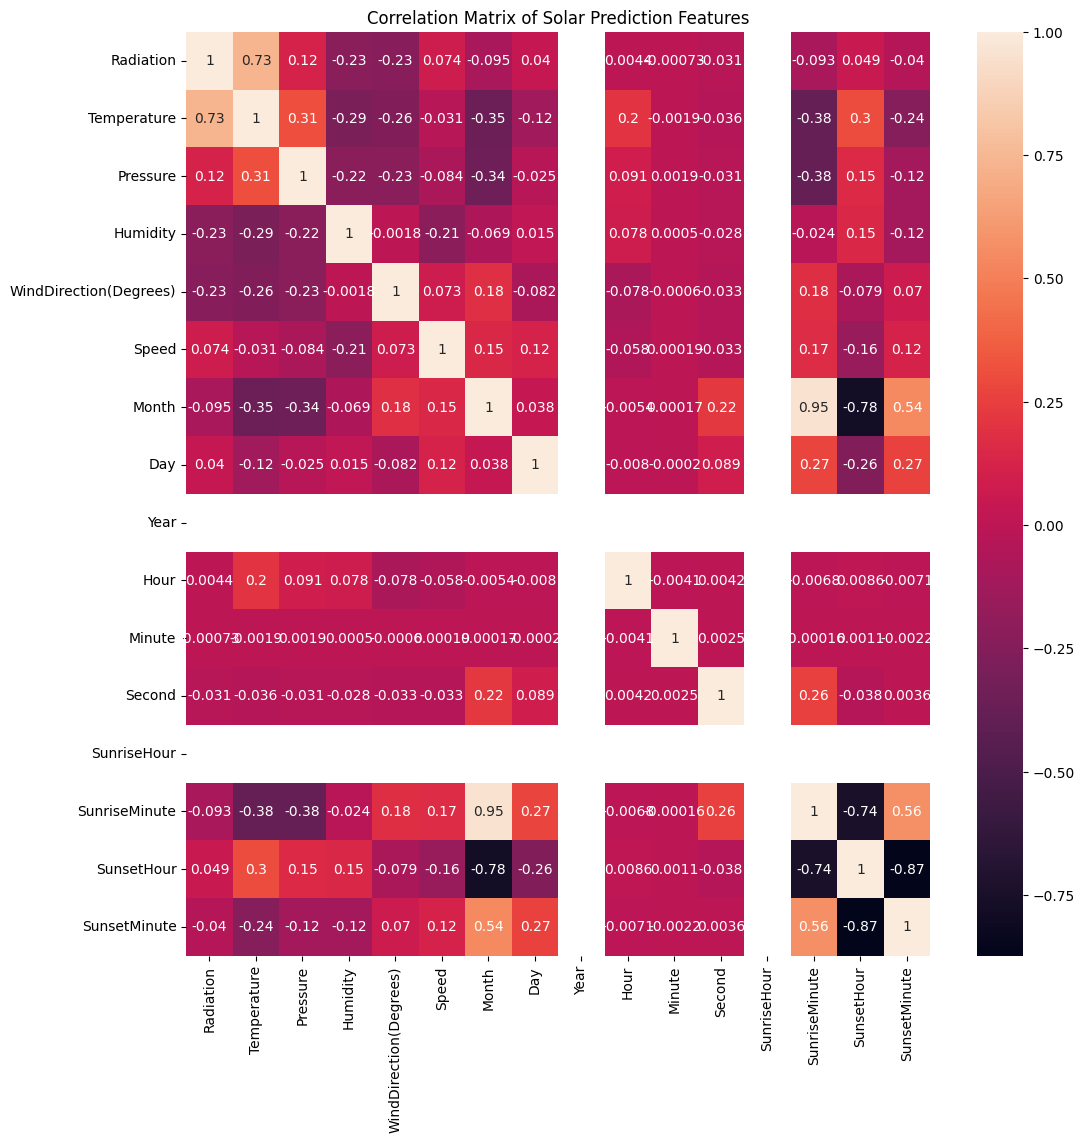

In [10]:
cor=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True)
plt.title('Correlation Matrix of Solar Prediction Features')
plt.show()

In [11]:
del df

In [12]:
scalar=MinMaxScaler()
scaled_X=scalar.fit_transform(X)
X_columns=X.columns

In [13]:
feature_selector = SelectKBest(f_regression, k='all')
selected_features = feature_selector.fit(scaled_X, y)

In [14]:
imp=pd.DataFrame(selected_features.scores_,index=X_columns,columns=['Importance'])
imp.sort_values(by='Importance',ascending=False, inplace=True)
imp

,Importance
Temperature,38392.663306
WindDirection(Degrees),1830.983183
Humidity,1762.022981
Pressure,469.611855
Month,300.510636
SunriseMinute,284.222948
Speed,178.142906
SunsetHour,77.761363
Day,52.321046
SunsetMinute,51.896708


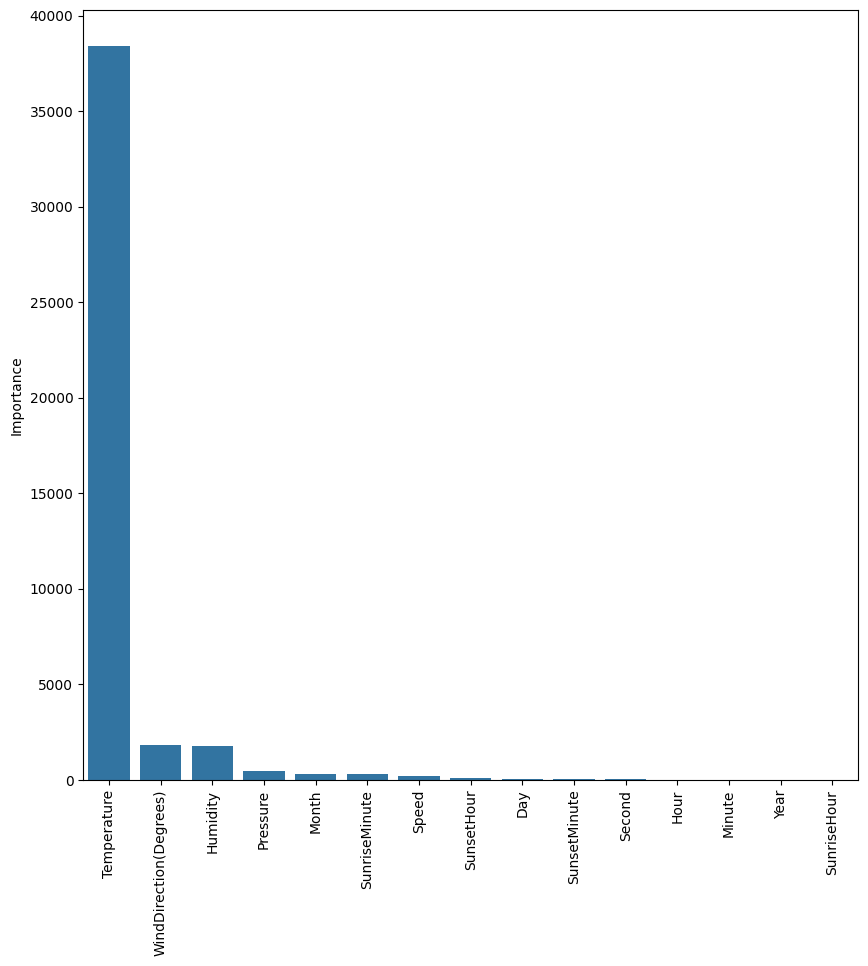

In [15]:
plt.figure(figsize=(10,10))
sns.barplot(imp.Importance)
plt.xticks(rotation=90)
plt.show()

In [16]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
model=ExtraTreesRegressor(n_estimators=50,verbose=1, n_jobs=1, max_depth=5, random_state=42)
model.fit(scaled_X,y)

In [19]:
imp=pd.DataFrame(model.feature_importances_,index=X_columns,columns=['Importance'])
imp.sort_values(by='Importance',ascending=False,inplace=True)
imp

,Importance
Temperature,0.556458
Hour,0.250421
WindDirection(Degrees),0.120221
Humidity,0.054006
SunsetHour,0.008798
Day,0.002787
Month,0.002369
Speed,0.001578
Pressure,0.001546
SunriseMinute,0.001236


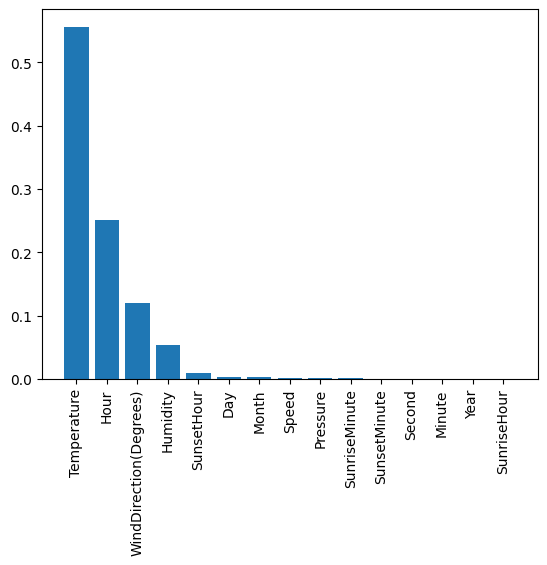

In [20]:
plt.bar(imp.index,imp['Importance'])
plt.xticks(rotation=90)
plt.show()

In [21]:
#feature Engineering

In [23]:
X.drop(['Year','SunriseHour'],axis=1)
pd.DataFrame(X)


,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Year,Hour,Minute,Second,SunriseHour,SunriseMinute,SunsetHour,SunsetMinute
0,48,30.46,59,177.39,5.62,9,29,2016,23,55,26,6,13,18,13
1,48,30.46,58,176.78,3.37,9,29,2016,23,50,23,6,13,18,13
2,48,30.46,57,158.75,3.37,9,29,2016,23,45,26,6,13,18,13
3,48,30.46,60,137.71,3.37,9,29,2016,23,40,21,6,13,18,13
4,48,30.46,62,104.95,5.62,9,29,2016,23,35,24,6,13,18,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,44,30.43,102,145.42,6.75,12,1,2016,0,20,4,6,41,17,42
32682,44,30.42,102,117.78,6.75,12,1,2016,0,15,1,6,41,17,42
32683,44,30.42,102,145.19,9.00,12,1,2016,0,10,1,6,41,17,42
32684,44,30.42,101,164.19,7.87,12,1,2016,0,5,2,6,41,17,42


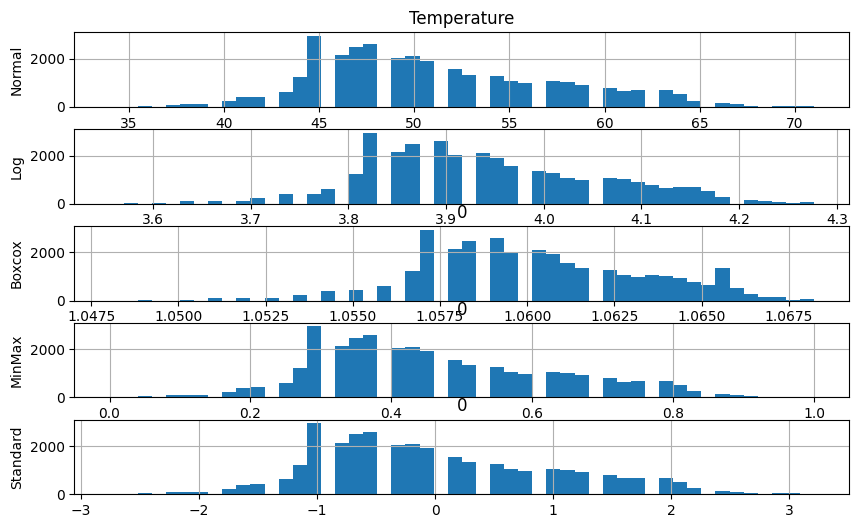

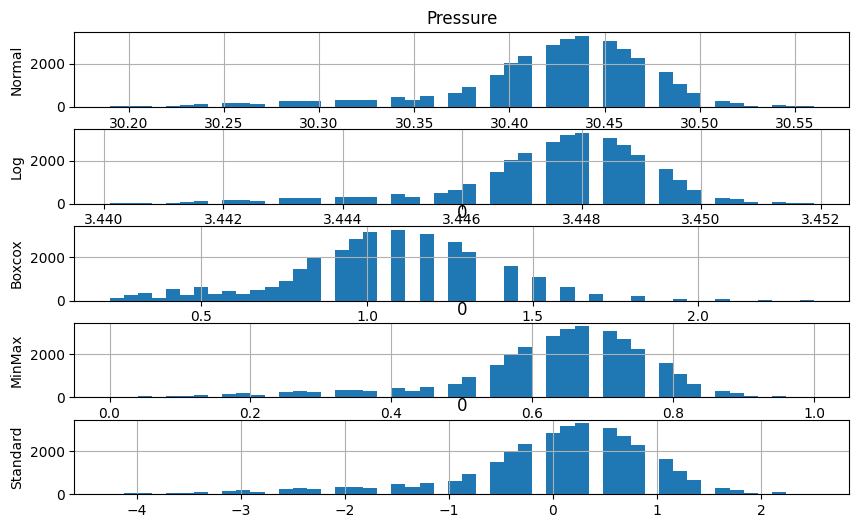

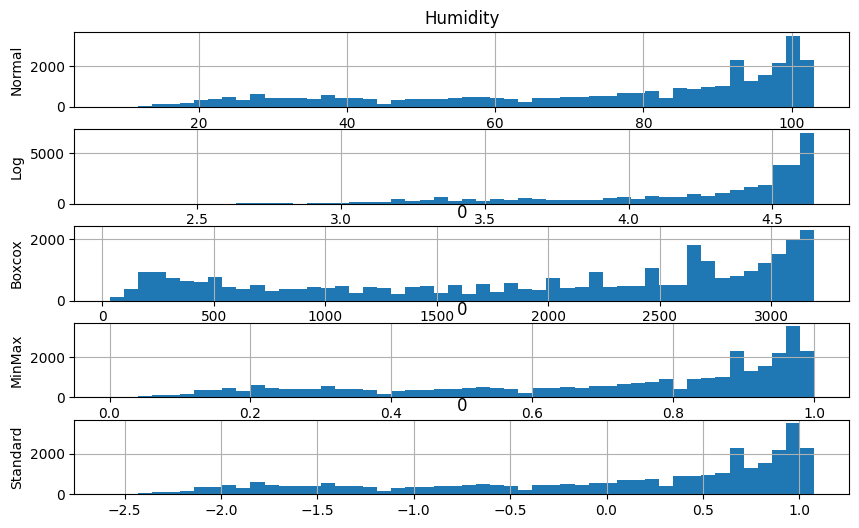

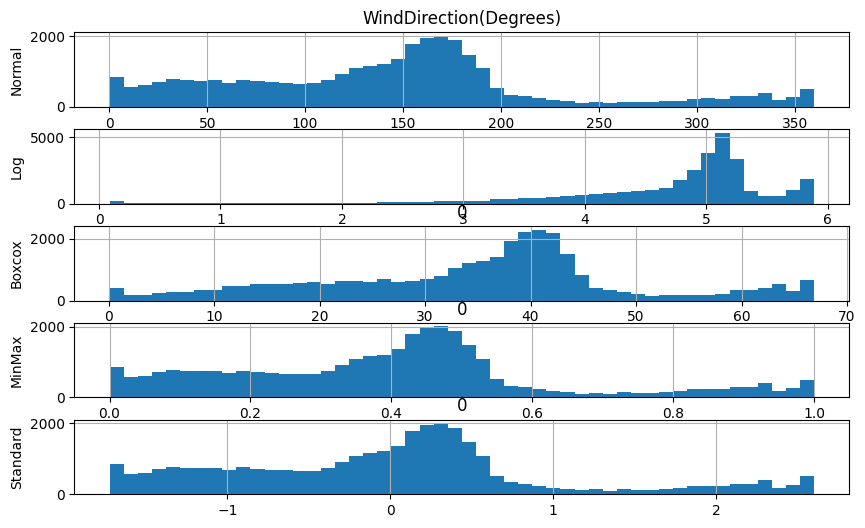

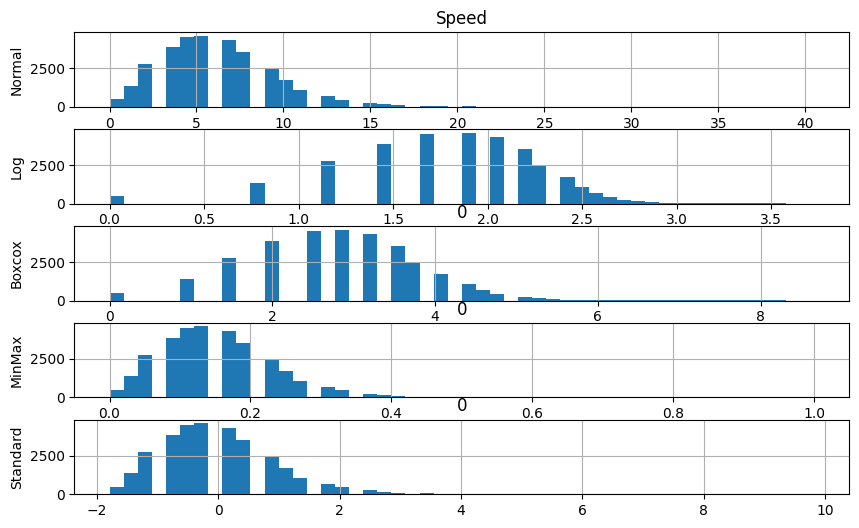

In [24]:
transform_features=['Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed']
for i in transform_features:
    fig, (ax1,ax2,ax3,ax4,ax5)= plt.subplots(5,1, figsize=(10,6))
    X[i].hist(ax=ax1, bins=50)
    ((X[i]+1).transform(np.log)).hist(ax=ax2, bins=50)
    pd.DataFrame(stats.boxcox(X[i]+1)[0]).hist(ax=ax3, bins=50)
    pd.DataFrame(MinMaxScaler().fit_transform(pd.DataFrame(X[i]))).hist(ax=ax4, bins=50)    
    pd.DataFrame(StandardScaler().fit_transform(pd.DataFrame(X[i]))).hist(ax=ax5, bins=50)    
    ax1.set_ylabel('Normal')
    ax2.set_ylabel('Log')
    ax3.set_ylabel('Boxcox')
    ax4.set_ylabel('MinMax')
    ax5.set_ylabel('Standard')
    ax1.set_title(i)

In [25]:
transform={'Temperture':(X["Temperature"]+1).transform(np.log),
           'Speed': (X['Speed']+1).transform(np.log),
           'WindDirection(Degrees)': MinMaxScaler().fit_transform(pd.DataFrame(X['WindDirection(Degrees)'])),
           'Pressure': stats.boxcox(X['Pressure']+1)[0],
           'Humidity': stats.boxcox(X['Humidity']+1)[0]}
           

In [26]:
for i in transform:
    X[i]=transform[i]

In [27]:
xTrain, xTest, yTrain, yTest=train_test_split(X,y, test_size=0.3)

In [28]:
pd.DataFrame(xTrain)

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Year,Hour,Minute,Second,SunriseHour,SunriseMinute,SunsetHour,SunsetMinute,Temperture
10391,49,9.065149e+296,2965.882692,0.237426,1.704748,10,21,2016,15,20,20,6,19,17,55,3.912023
13792,60,7.981408e+296,2092.237027,0.031040,1.704748,10,9,2016,15,50,22,6,16,18,4,4.110874
27259,57,1.097115e+297,2092.237027,0.240788,2.505526,12,22,2016,11,30,49,6,53,17,49,4.060443
23983,48,1.245832e+297,460.543899,0.484299,2.047693,11,2,2016,21,0,22,6,24,17,48,3.891820
16286,48,7.488910e+296,2855.771784,0.413800,1.704748,11,29,2016,15,5,4,6,40,17,42,3.891820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17087,45,1.414595e+297,2434.809390,0.410410,2.883123,11,26,2016,20,20,19,6,38,17,42,3.828641
1797,60,9.660719e+296,2092.237027,0.364419,1.890095,9,23,2016,14,10,21,6,12,18,18,4.110874
2070,68,8.506123e+296,935.284893,0.346635,2.883123,9,22,2016,15,15,18,6,11,18,19,4.234107
16041,53,1.029521e+297,3077.931532,0.195020,1.890095,10,1,2016,16,40,24,6,13,18,11,3.988984


In [29]:
scaler=StandardScaler()
xTrain=scaler.fit_transform(xTrain)
xTest=scaler.transform(xTest)

#XGBoost

In [30]:
from xgboost import XGBRegressor

model=XGBRegressor(learning_rate=0.1,max_depth=8)
model.fit(xTrain,yTrain)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [31]:
y_pred=model.predict(xTest)

In [32]:
rmse=np.sqrt(mean_squared_error(yTest,y_pred))
r2=r2_score(yTest,y_pred)

print(f"rmse : {rmse:.2f}")
print(f"r2 : {r2:.2f}")

rmse : 83.55
r2 : 0.93


#Multilayer Perceptron Model

In [38]:
model=Sequential([
    Dense(123,activation='relu',input_dim=16),
    #Dropout(0.33),
    Dense(32,activation='relu'),
    #Dropout(0.33),
    Dense(1)
])
    


In [39]:
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 123)               2091      
                                                                 
 dense_5 (Dense)             (None, 32)                3968      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6092 (23.80 KB)
Trainable params: 6092 (23.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
history=model.fit(xTrain,yTrain,validation_split=0.1,epochs=20,batch_size=32)

Epoch 1/20
644/644 [==============================] - 3s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 2/20
644/644 [==============================] - 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 3/20
644/644 [==============================] - 1s 2ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 4/20
644/644 [==============================] - 2s 2ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 5/20
644/644 [==============================] - 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 6/20
644/644 [==============================] - 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 7/20
644/644 [==============================] - 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 8/20
644/644 [==============================] - 2s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 9/20
644/644 [====================

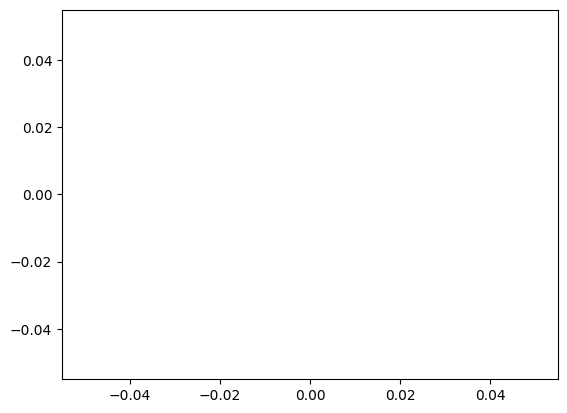

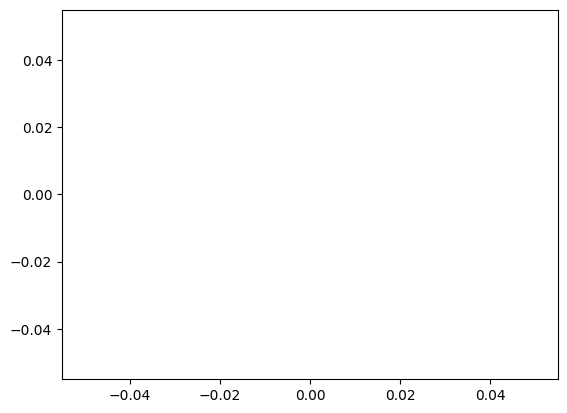

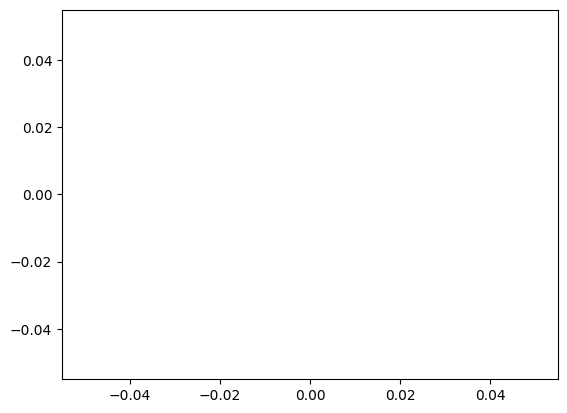

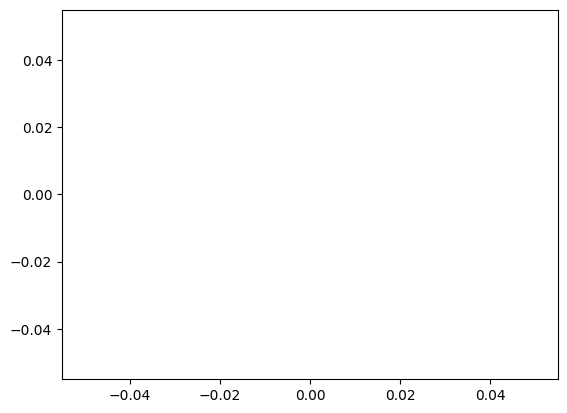

In [42]:
fit=history.history
for i in fit:
    plt.plot(fit[i])
    plt.show()